# Assignment 2: Classification
# Using Machine Learning Tools

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of classifying data from histological cell images for the diagnosis of malignant breast cancer. This will be presented as a practical scenario where you are approached by a client to solve a problem.  

The main aims of this assignment are:

- to use the best practice machine learning workflow for producing a solution to a client's problem;
- to visualise and clean data;
- to train and optimise a selection of models, then choose the best;
- to obtain an unbiased measurement of the final model's performance;
- to interpret results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task, but feel free to add additional cells to structure your notebook. Note that some questions require writing code, some require graphical results, and some require comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (**with the correct results displayed**) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code can run correctly on the original data file.

This assignment uses the standard best practice machine learning workflow, building on the first assignment and course workshops, and so less detailed instructions are provided for this assignment. You should be able to implement this workflow now without low-level guidance and a substantial portion of the marks for this assignment are associated with the appropriate choices and executing this workflow correctly and efficiently. Make sure you have clean, readable code as well as producing outputs, since your coding will also count towards the marks (however, excessive commenting is discouraged and will lose marks, so aim for a modest, well-chosen amount of comments and text in outputs).

This assignment can be solved using methods from [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), and [matplotlib](https://matplotlib.org/stable/index.html) as presented in the workshops. Other libraries should not be used (even though they might have nice functionality) and occasionally certain specific functions need to be used, which will be made clear in the instruction text. You are expected to make sure that you are using functions correctly, and you should search and carefully read the documentation if unsure.

# Scenario

A client approaches you to solve a machine learning problem for them.  They run a pathology lab that processes histological images for healthcare providers and they have created a product that measures most of the same features as in the *Wisconsin breast cancer data set* though using different acquisitions and processing methods. Their method employs efficient stochastic sampling, making it much faster than existing methods, although slightly noisier. This method does not measure any of the 'worst' features that appear in the *Wisconsin Breast Cancer Data Set*. They want to be able to diagnose *malignant* cancer (and distinguish them from *benign* growths) by employing machine learning techniques, and they have asked you to implement this for them.

Their requirements are:
 - 1) Have at least a 90% probability of detecting malignant cancer when it is present;
 - 2) Ensure that no more than 1 in 5 healthy cases (those with benign growths) result in a false positive (labeled as malignant).

They have hand-labelled 220 samples for you, with 20 features per sample, which is all they have at the moment.

Please follow the instructions below, which will vary in level of detail.

## 1. Load data, visualise it and identify erroneous values [30%]

 - Load the data from the csv file `assignment2_data_2024.csv` (found on MyUni).
 - Extract the feature names and label names for use later on.
 - Provide at least one text summary of the dataset. This should include key information and characteristics of the data.
 - Create one graphical plot per feature. Each plot must display the feature values for the two classes (malignant and benign) separately on a single axis/panel.
 - Make sure you clearly label the graphical plots with respect to feature names, axes, classes, etc.
 - Identify any erroneous values in the dataset during the data visualisation or summary steps. Determine and implement, here or later, the appropriate action to handle these values (e.g., removal, correction, or none).
 - Throughout this assignment, treat the _malignant_ cases as the _true positive_ class, following the standard convention in medicine.
.

In [1]:
# This code imports some libraries that you will need.
# You should not need to modify it, though you are expected to make other imports later in your code.

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import numpy as np
import time

# Pandas for overview
import pandas as pd

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn import tree
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# Plot setup
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=7)
mpl.rc('xtick', labelsize=6)
mpl.rc('ytick', labelsize=6)
mpl.rc('figure', dpi=240)
plt.close('all')

import seaborn as sns

In [2]:
# Your code here
cancer_data = pd.read_csv("assignment2_data_2024.csv")
cancer_df = cancer_data.copy()
cancer_data.head(10)

,label,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error
0,malignant,15.494653829645529,15.902542,103.008265,776.437239,0.104239,0.168660,0.170572,0.085668,0.205053,...,0.653654,1.096678,4.962255,80.619370,0.006669,0.034950,0.043568,0.013765,0.024093,0.004928
1,malignant,16.229870799611437,18.785613,105.176755,874.712003,0.091843,0.092548,0.081681,0.053670,0.180435,...,0.445451,1.043931,3.005373,50.407958,0.006352,0.019998,0.025324,0.012172,0.018084,0.003582
2,malignant,16.34567074196476,20.114076,107.083804,872.563251,0.099924,0.123799,0.128788,0.078310,0.189756,...,0.549625,1.057447,3.643671,62.732851,0.006757,0.031325,0.034350,0.015150,0.021459,0.004066
3,maligant,13.001009157806651,19.876997,85.889775,541.281012,0.113423,0.173069,0.146214,0.069574,0.212078,...,0.430693,1.202955,3.051434,33.614356,0.007930,0.044881,0.042972,0.014556,0.035670,0.005981
4,malignant,16.416060073302194,17.397533,107.857386,891.516818,0.097321,0.111530,0.125971,0.068575,0.179562,...,0.525532,1.045900,3.747194,59.164555,0.008718,0.024231,0.039763,0.014202,0.019236,0.004115
5,malignant,13.44652732131547,17.957298,88.110900,581.567322,0.107720,0.128542,0.112771,0.060392,0.190065,...,0.377676,1.093476,2.625960,34.685524,0.007198,0.028281,0.033037,0.011569,0.020574,0.004214
6,malignant,15.55225019385569,19.372353,101.558673,790.894093,0.095646,0.106649,0.098832,0.058009,0.181995,...,0.419524,1.049395,2.963010,44.927448,0.006110,0.021505,0.029675,0.011264,0.018432,0.003234
7,malignant,13.986378166753155,19.841165,91.325055,628.642710,0.104265,0.124145,0.090085,0.052699,0.195356,...,0.475859,1.264925,3.262840,45.387955,0.007677,0.026486,0.029210,0.012797,0.018196,0.004264
8,malignant,13.75810271397698,20.003542,90.623580,611.621162,0.107706,0.137510,0.125245,0.065605,0.200009,...,0.367752,1.098793,2.693607,34.350214,0.006602,0.029599,0.034888,0.012244,0.020763,0.003930
9,malignant,13.561893436106663,20.963861,89.362028,592.703670,0.104794,0.154252,0.139630,0.062670,0.189246,...,0.376591,1.380643,2.650348,35.125624,0.007264,0.042568,0.048240,0.012894,0.019610,0.006033


In [3]:
# Your code here
features = cancer_df.columns[1: ]
labels = cancer_df['label'].value_counts()

print("Features:")
for feature in features:
    print(f"- {feature}")

print("\nLabel Distribution:")
for label, count in labels.items():
    print(f"{label}: {count}")

Features:
- mean radius
- mean texture
- mean perimeter
- mean area
- mean smoothness
- mean compactness
- mean concavity
- mean concave points
- mean symmetry
- mean fractal dimension
- radius error
- texture error
- perimeter error
- area error
- smoothness error
- compactness error
- concavity error
- concave points error
- symmetry error
- fractal dimension error

Label Distribution:
benign: 154
malignant: 65
maligant: 1


As we can see there are 3 labels (classes) but there are supposed to be only two classes (malignant and benign) as mentioned in points above.
We observe three different class names, but only two - malignant and benign - are expected. The class "maligant" appears to be a typo, so we should replace all instances of it with "malignant."

In [4]:
cancer_df.loc[cancer_df['label'] == 'maligant', 'label'] = 'malignant'

In [5]:
labels = [*cancer_df['label'].unique()[::-1]]
labels

['benign', 'malignant']

In [6]:
summary = cancer_data.describe()
summary

,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,219.000000,220.000000
mean,18.991963,89.866240,620.956227,0.096480,0.102879,0.085281,0.046867,0.181850,0.103957,0.393337,1.217593,2.775090,37.781034,0.007076,0.025514,0.031901,0.011762,0.020901,0.003873
std,1.427635,7.366180,106.419871,0.004961,0.019819,0.026911,0.012548,0.010816,0.606979,0.075828,0.210182,0.579317,9.988655,0.001043,0.007345,0.014102,0.002422,0.003250,0.001259
min,15.349270,74.690886,-2.645499,0.084651,0.075184,0.050771,0.028701,0.157059,0.058922,0.298005,0.898026,2.059186,27.693748,0.004994,0.016907,0.018730,0.007253,0.016181,0.002631
25%,17.914319,84.911981,558.731832,0.092797,0.089531,0.066525,0.038106,0.174944,0.061139,0.343114,1.073344,2.394331,31.843894,0.006372,0.020530,0.025373,0.010336,0.018658,0.003225
50%,18.928256,88.587737,603.806128,0.096457,0.098517,0.075748,0.042761,0.180953,0.062557,0.367863,1.165727,2.610732,34.007608,0.006837,0.023147,0.028835,0.011357,0.020193,0.003555
75%,19.995859,93.066393,655.690435,0.099817,0.113276,0.098826,0.055337,0.186354,0.064184,0.420514,1.300769,3.003888,39.042484,0.007675,0.027733,0.033620,0.012669,0.022195,0.004046
max,24.430831,121.247839,1103.740620,0.113423,0.192880,0.201971,0.100467,0.226448,9.065897,0.712896,2.561348,5.903661,80.619370,0.011088,0.054950,0.163592,0.026554,0.041861,0.013251


In [7]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    220 non-null    object 
 1   mean radius              220 non-null    object 
 2   mean texture             220 non-null    float64
 3   mean perimeter           220 non-null    float64
 4   mean area                220 non-null    float64
 5   mean smoothness          220 non-null    float64
 6   mean compactness         220 non-null    float64
 7   mean concavity           220 non-null    float64
 8   mean concave points      220 non-null    float64
 9   mean symmetry            220 non-null    float64
 10  mean fractal dimension   220 non-null    float64
 11  radius error             220 non-null    float64
 12  texture error            220 non-null    float64
 13  perimeter error          220 non-null    float64
 14  area error               2

In [8]:
'''
    The dataset consists of 220 samples, each of which has 20 different features that are mean measurements of the radius, texture, perimeter, area, and others, 
    along with the label column indicating malignant or benign cancer. A symmetrical mistake occurred in a single column of the 'symmetry error' and also we can 
    see there is a negative value in area and as area can not be negative so we will handle that too. The company has established objectives that include a minimum
    of 90% accuracy for the cancer detection model and an error rate of no more than 20% for benign cases. The next steps involve handling missing data, feature 
    encoding, model selection and training, performance evaluation, and deployment.
    The main aim is to make the model fit the client's criteria by those means.

'''
cancer_df.describe()

,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,219.000000,220.000000
mean,18.991963,89.866240,620.956227,0.096480,0.102879,0.085281,0.046867,0.181850,0.103957,0.393337,1.217593,2.775090,37.781034,0.007076,0.025514,0.031901,0.011762,0.020901,0.003873
std,1.427635,7.366180,106.419871,0.004961,0.019819,0.026911,0.012548,0.010816,0.606979,0.075828,0.210182,0.579317,9.988655,0.001043,0.007345,0.014102,0.002422,0.003250,0.001259
min,15.349270,74.690886,-2.645499,0.084651,0.075184,0.050771,0.028701,0.157059,0.058922,0.298005,0.898026,2.059186,27.693748,0.004994,0.016907,0.018730,0.007253,0.016181,0.002631
25%,17.914319,84.911981,558.731832,0.092797,0.089531,0.066525,0.038106,0.174944,0.061139,0.343114,1.073344,2.394331,31.843894,0.006372,0.020530,0.025373,0.010336,0.018658,0.003225
50%,18.928256,88.587737,603.806128,0.096457,0.098517,0.075748,0.042761,0.180953,0.062557,0.367863,1.165727,2.610732,34.007608,0.006837,0.023147,0.028835,0.011357,0.020193,0.003555
75%,19.995859,93.066393,655.690435,0.099817,0.113276,0.098826,0.055337,0.186354,0.064184,0.420514,1.300769,3.003888,39.042484,0.007675,0.027733,0.033620,0.012669,0.022195,0.004046
max,24.430831,121.247839,1103.740620,0.113423,0.192880,0.201971,0.100467,0.226448,9.065897,0.712896,2.561348,5.903661,80.619370,0.011088,0.054950,0.163592,0.026554,0.041861,0.013251


The `mean radius` feature is stored as `object` type, while it is a numeric feature. Let's first investigate what's going on.

In [9]:
non_numerical = pd.to_numeric(cancer_df['mean radius'], errors='coerce')

# Find non-numeric values (which are now NaN)
non_numeric_values = cancer_df.loc[non_numerical.isna(), 'mean radius']
non_numeric_indices = cancer_df.loc[non_numerical.isna(), 'mean radius'].index

# Display the rows with non-numeric values in 'mean radius'
print(non_numeric_values)

61    n12.254518716420597
Name: mean radius, dtype: object


Looks like there is an erroneous non-numeric character present in one of the values. Since there is just one such example, we can simply remove all non-numeric characters from the column and convert it to numeric.

In [10]:
cancer_df['mean radius'] = cancer_df['mean radius'].str.replace(r'[^0-9.]', '', regex=True)
cancer_df['mean radius'] = pd.to_numeric(cancer_df['mean radius']) 

In [11]:
cancer_df['mean radius'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 220 entries, 0 to 219
Series name: mean radius
Non-Null Count  Dtype  
--------------  -----  
220 non-null    float64
dtypes: float64(1)
memory usage: 1.8 KB


Also, the output of `describe()` shows that the `mean area` feature might contain negative value(s). Since the area can not be a negative number, we need to check if this is intentional or an error.

In [12]:
len(cancer_df[cancer_df['mean area'] < 0])

1

Only one such value most likely indicates an error, let us get rid of it. For now, I am converting it to `NaN`, so that we can tackle it in a cleaner way with `sklearn.impute` later.

In [13]:
cancer_df.loc[cancer_df['mean radius']<0, 'mean radius'] = np.nan

<Axes: xlabel='symmetry error', ylabel='Density'>

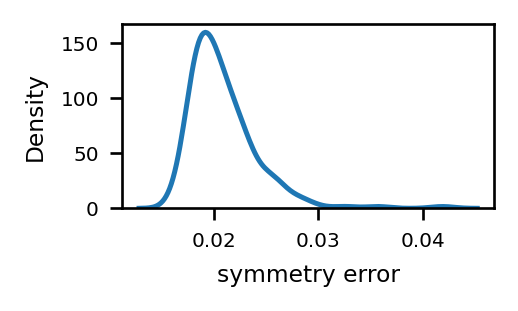

In [14]:
plt.figure(figsize=(2, 1))
sns.kdeplot(cancer_df['symmetry error'])

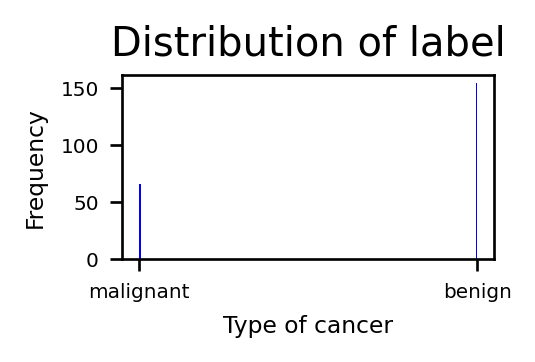

In [15]:
#splliting labels and features
X, y = cancer_df.drop(['label'], axis=1), cancer_df['label']

plt.figure(figsize=(2,1))
plt.hist(cancer_df['label'], bins=200, color='blue')
plt.title('Distribution of label')
plt.xlabel('Type of cancer')
plt.ylabel('Frequency')
plt.show()


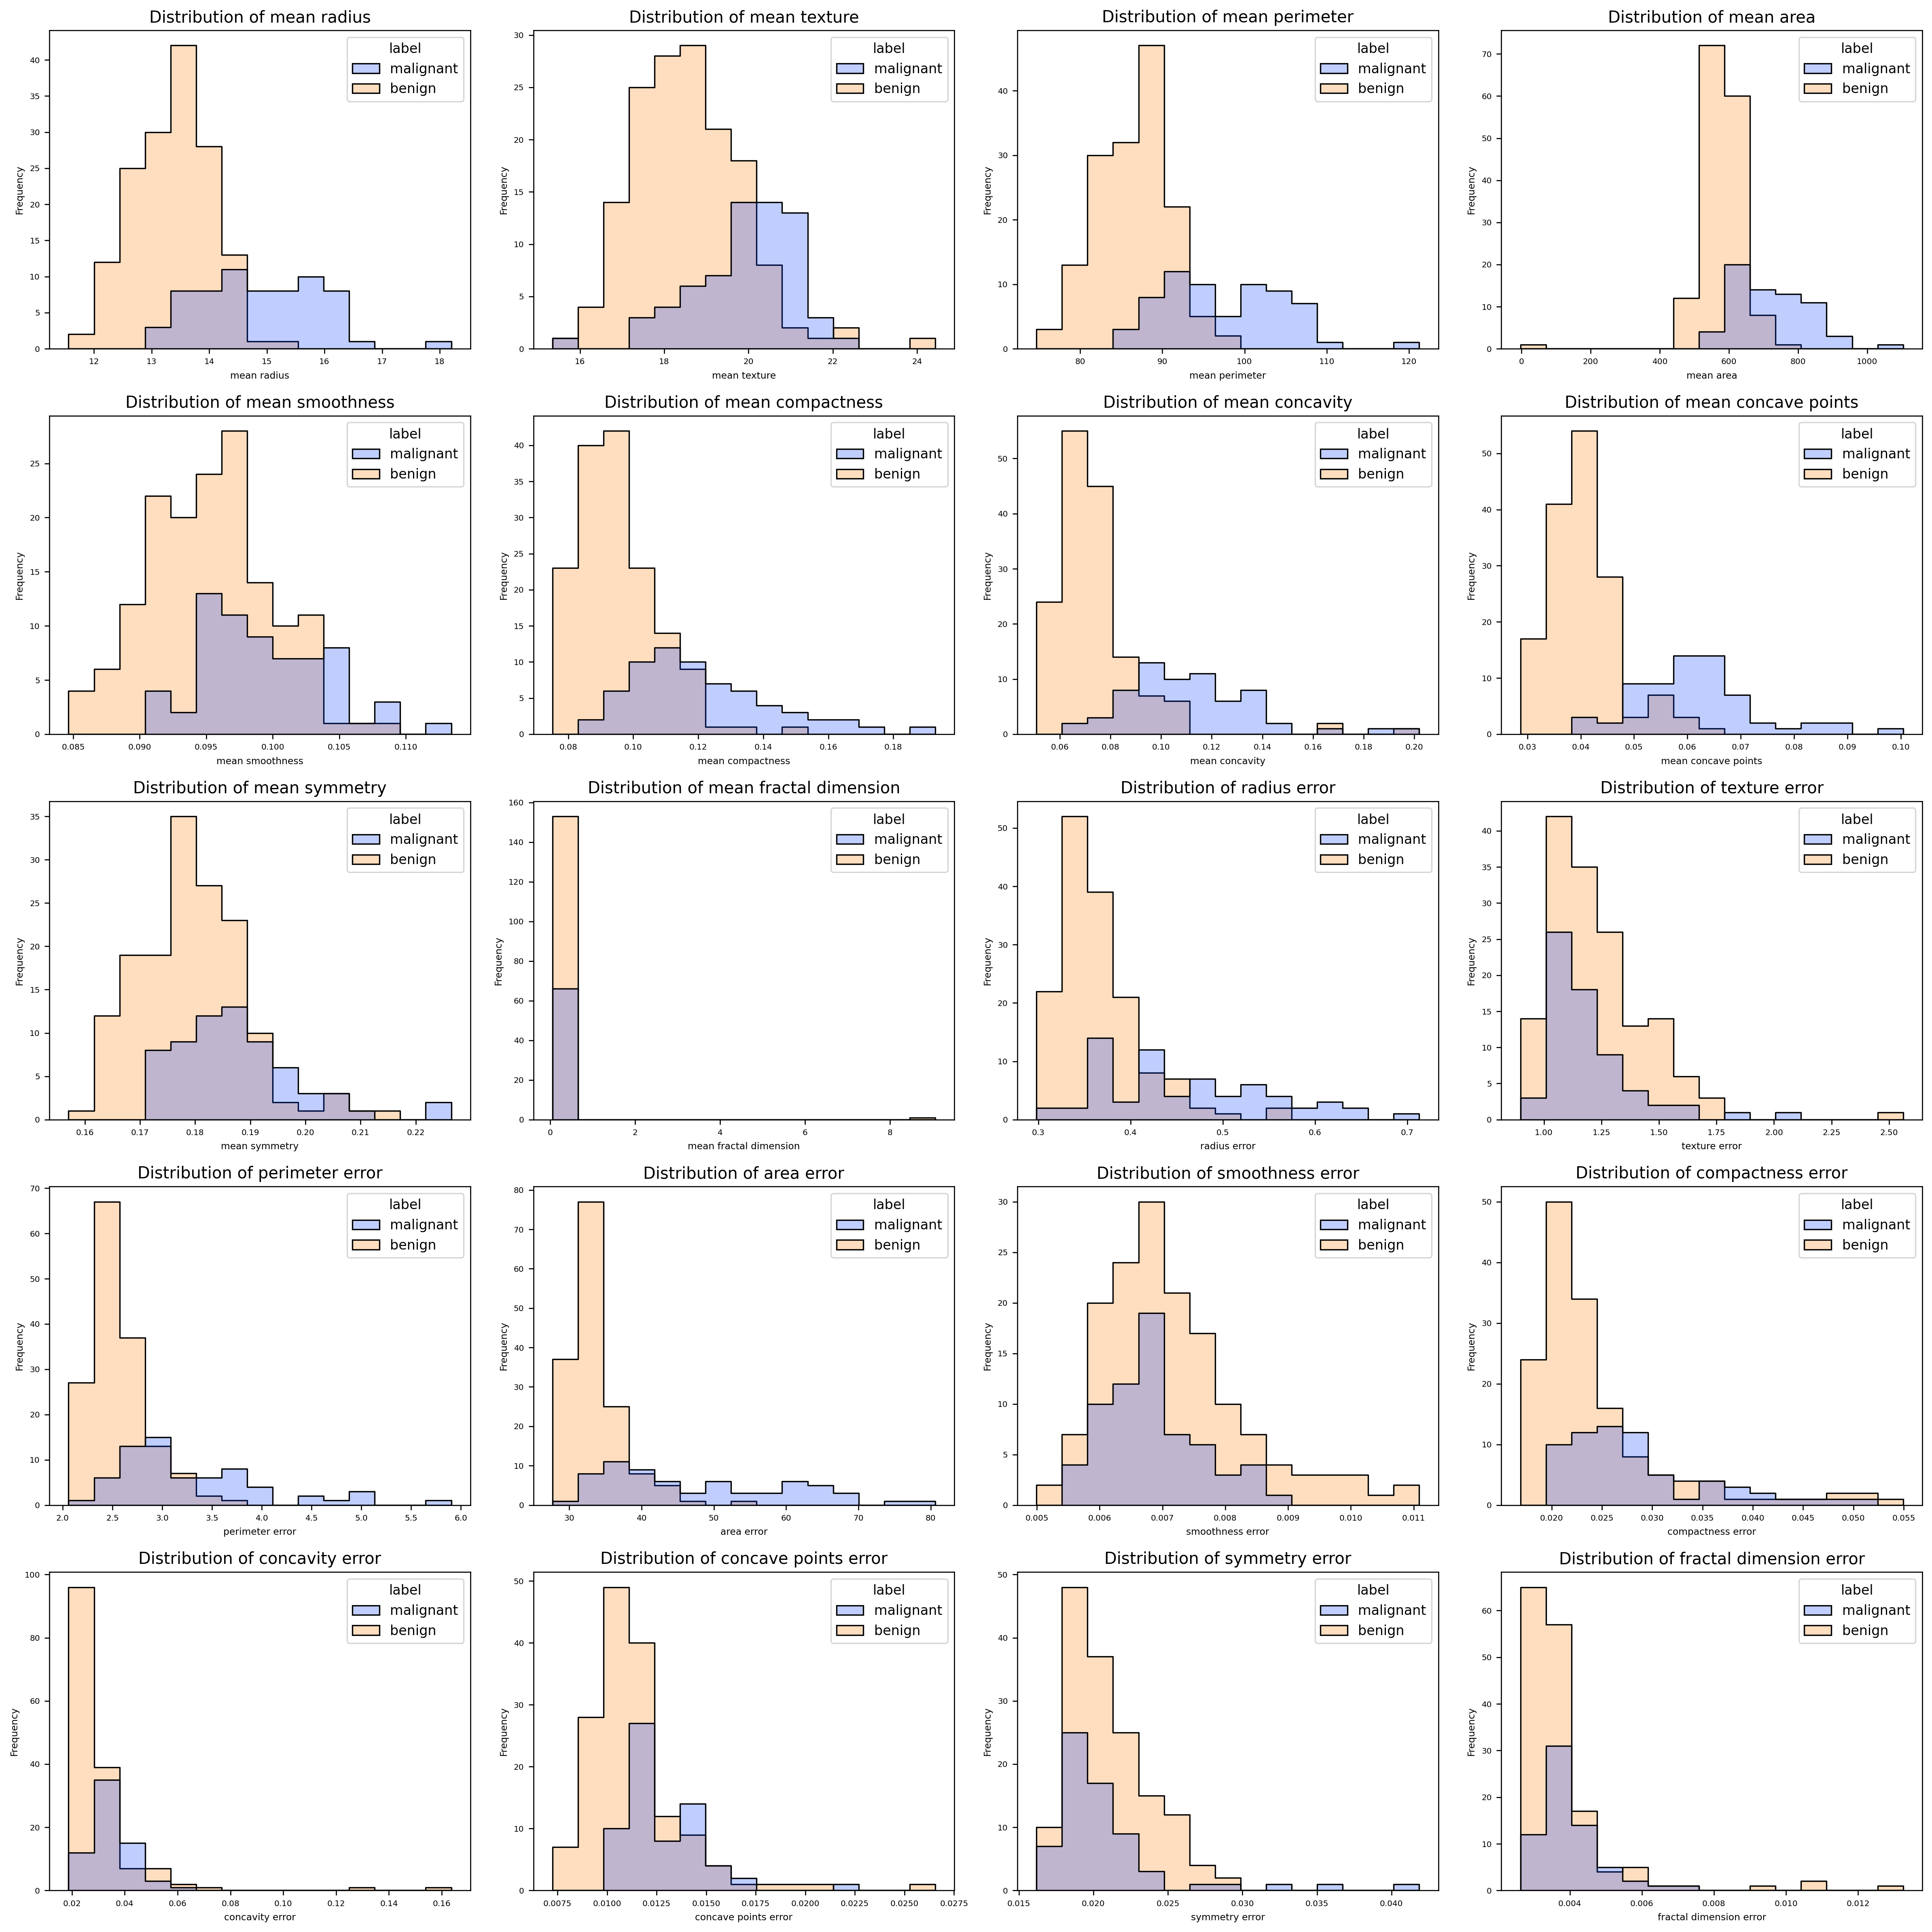

In [16]:
#hist of all features

#Set up the matplotlib figure
fig, axes = plt.subplots(5,4, figsize=(20, 20))
axes = axes.flatten()

# Loop through the features and create a histogram for each
for i, feature in enumerate(features):
    sns.histplot(data=cancer_df, x=feature, hue='label', bins=15, ax=axes[i], element='step', stat='count', common_norm=False, palette='bright', edgecolor='black')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

As it seems, the `mean fractal dimension` might possibly contain anomalies. Let us investigate the issue with a box-plot.

<Axes: xlabel='mean fractal dimension'>

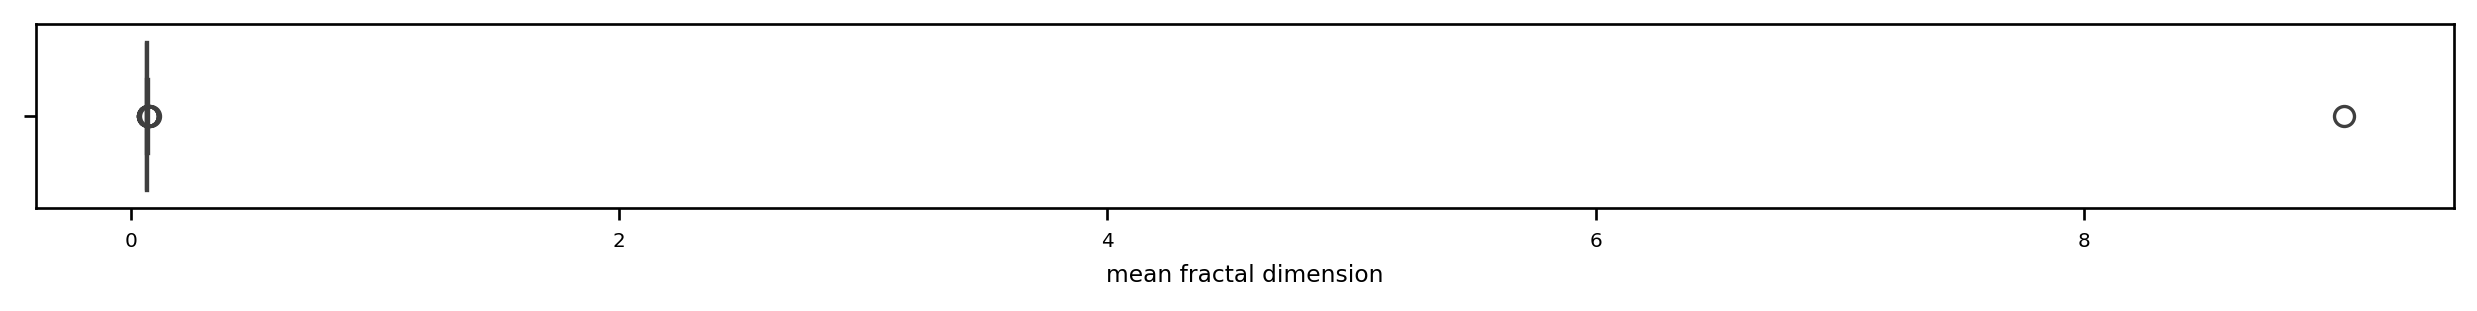

In [17]:
plt.figure(figsize=(13,1))
sns.boxplot(data=cancer_df, x='mean fractal dimension')

As we can see there is an outlier which is very far from the mean So we will convert that to NaN and handle it with preprocessing using sklearn later.

In [18]:
from scipy import stats

# Calculate Z-scores for the 'mean fractal dimension' column
z_scores = stats.zscore(cancer_df['mean fractal dimension'])

# Identify the index of the single outlier
outlier_index = np.where(np.abs(z_scores) > 3)[0]

# Replace the outlier with NaN
cancer_df.loc[outlier_index, 'mean fractal dimension'] = np.nan


<Axes: xlabel='mean fractal dimension'>

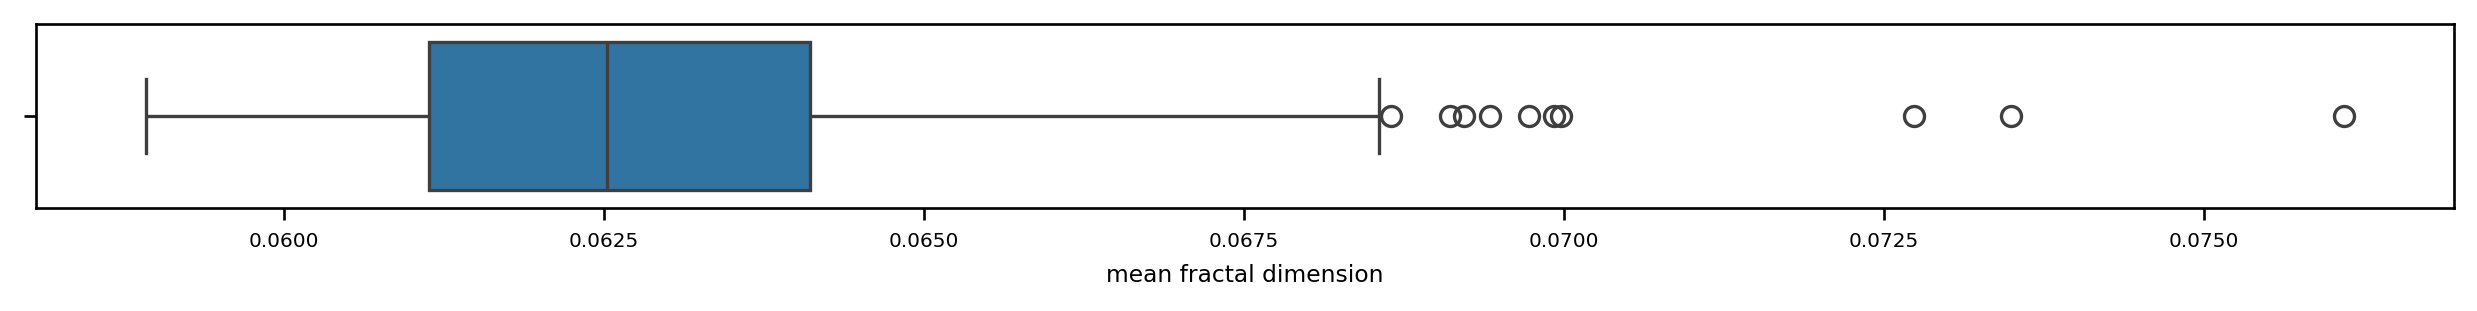

In [19]:
plt.figure(figsize=(13,1))
sns.boxplot(data=cancer_df, x='mean fractal dimension')

Finally, as the classes appear imbalanced, it might be argued that we should use oversampling techniques. However, the imabalance is not too severe (65-35%), and introducing oversampling in such a small dataset might cause overfitting, hence we shall use the dataset as it is. Moreover, the use of stratified shuffle further diminishes the effect of class imbalance.

## 2. Prepare data and models, and make baseline measurements [20%]
 - Split data into appropriate sets using the `stratify` option to obtain consistent proportions of classes in each set.
 - Decide on appropriate pre-processing steps for the data.
 - Implement a _very_ simple baseline model that makes purely random predictions of the class.
 - Measure the baseline performance with the following metrics:
   - accuracy
   - balanced accuracy: accounts for imblanaced datasets, defined as _(sensitivity + specificity)/2_
   - recall
   - precision
   - auc
   - f1score
   - fbeta_scores with beta=0.1
   - fbeta_score with beta=10
 - Also display a confusion matrix for the baseline predictions.
 - As a second baseline, implement an SGD classifier and fit it once (without hyper-parameter optimisation) and then display the same performance metrics and a confusion matrix for its results.

In [20]:
# Some helpful code that you can use if you wish (or not)

from sklearn.metrics import fbeta_score, make_scorer

f10_scorer = make_scorer(fbeta_score, beta=10)
f01_scorer = make_scorer(fbeta_score, beta=0.1)

def f10_score(yt,yp):
    return fbeta_score(yt, yp, beta=10)

def f01_score(yt,yp):
    return fbeta_score(yt, yp, beta=0.1)

In [21]:
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    recall_score,
    precision_score,
    roc_auc_score,
    f1_score,
    fbeta_score,
    confusion_matrix
)
from sklearn.utils.validation import check_is_fitted, NotFittedError

def evaluate_model(model, X_train, X_test, y_train, y_test, labels, conf_mat=True, figsize=(2,2)):
    
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    
    # Check if the model is already fitted
    try:
        check_is_fitted(model)
        print("Model is already fitted. Skipping fitting step.")
    except NotFittedError:
        print("Fitting the model...")
        model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Predict probabilities for AUC calculation
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        # If the model doesn't have predict_proba, use decision function for AUC
        y_proba = model.decision_function(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    f1 = f1_score(y_test, y_pred)
    fbeta_0_1 = fbeta_score(y_test, y_pred, beta=0.1)
    fbeta_10 = fbeta_score(y_test, y_pred, beta=10)
    
    # Confusion Matrix and FPR
    if conf_mat:
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        fpr = fp / (fp + tn)
        
        plt.figure(figsize=figsize)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title('Confusion Matrix')
        plt.show()
    
    # Return the scores as a dictionary
    return {
        'accuracy': accuracy,
        'balanced_accuracy': balanced_acc,
        'recall': recall,
        'precision': precision,
        'auc': auc,
        'f1_score': f1,
        'fbeta_score_0_1': fbeta_0_1,
        'fbeta_score_10': fbeta_10,
        'fpr': fpr,
        'cm': cm
    }


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

X, y = cancer_df[features], cancer_df['label']
label_mapping = {'malignant': 1, 'benign': 0}
y = [label_mapping[label] for label in y]
y = LabelBinarizer(pos_label=1).fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=cancer_df['label'])


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Create a pipeline to preprocess the data
preprocess_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Fit the pipeline to the training data
X_train_preprocessed = preprocess_pipeline.fit_transform(X_train)
X_test_preprocessed = preprocess_pipeline.transform(X_test)

In [24]:
X_train_preprocessed.shape, X_test_preprocessed.shape, y_train.shape, y_test.shape

((176, 20), (44, 20), (176, 1), (44, 1))

In [25]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy='uniform', random_state=42)

Fitting the model...


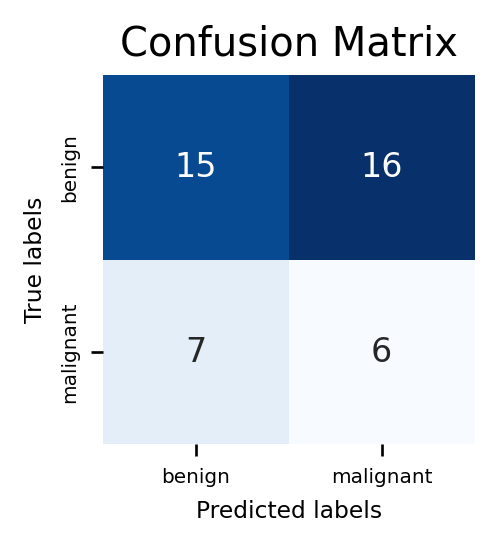

{'accuracy': 0.4772727272727273,
 'balanced_accuracy': 0.47270471464019853,
 'recall': 0.46153846153846156,
 'precision': 0.2727272727272727,
 'auc': 0.5,
 'f1_score': 0.34285714285714286,
 'fbeta_score_0_1': 0.27383642114776324,
 'fbeta_score_10': 0.4583963691376702,
 'fpr': 0.5161290322580645,
 'cm': array([[15, 16],
        [ 7,  6]])}

In [26]:
evaluate_model(dummy_clf, X_train_preprocessed, X_test_preprocessed, y_train, y_test, labels=labels)

Fitting the model...


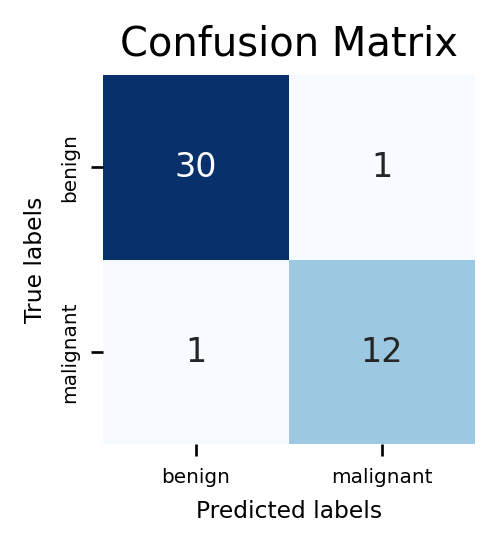

{'accuracy': 0.9545454545454546,
 'balanced_accuracy': 0.9454094292803971,
 'recall': 0.9230769230769231,
 'precision': 0.9230769230769231,
 'auc': 0.9801488833746899,
 'f1_score': 0.9230769230769231,
 'fbeta_score_0_1': 0.9230769230769231,
 'fbeta_score_10': 0.9230769230769231,
 'fpr': 0.03225806451612903,
 'cm': array([[30,  1],
        [ 1, 12]])}

In [27]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
evaluate_model(sgd_clf, X_train_preprocessed, X_test_preprocessed, y_train, y_test, labels=labels)

## 3. Model Optimisation [40%]

### 3.1 Performance metric
Choose one performance metric from the above set. State your choice and explain why you chose it. [50 words maximum]

In [28]:
# Answer here
'''
The client's requirements are: the model must achieve at least 90% Recall (True Positive Rate) to ensure it detects malignant cancer when present,
and maintain a False Positive Rate no higher than 20% (ensuring no more than 1 in 5 benign cases are misclassified as malignant). 
Thus, Recall and False Positive Rate are the key evaluation metrics.
'''

"\nThe client's requirements are: the model must achieve at least 90% Recall (True Positive Rate) to ensure it detects malignant cancer when present,\nand maintain a False Positive Rate no higher than 20% (ensuring no more than 1 in 5 benign cases are misclassified as malignant). \nThus, Recall and False Positive Rate are the key evaluation metrics.\n"

### 3.2 Hyper-parameter optimisation
 - Perform a hyper-parameter optimisation (using appropriate methods) on three models:
   - SGD Classifer
   - SVM
   - One other model of your choice
 - Display the results of each model (including confusion matrices) and choose the best model.
 - Choose the best model and display the final results of this model.

In [32]:
# Your code here
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform, randint

# Parameter dictionary for RandomizedSearchCV
param_distributions_sgd = {
    'loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': uniform(1e-4, 1 - 1e-4),  
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': uniform(1e-4, 1 - 1e-4),  
    'max_iter': randint(1000, 5000)  
}

# Parameter dictionary for SVC with distributions
param_distributions_svc = {
    'C': uniform(0.1, 1000 - 0.1),  
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': randint(2, 6),  
    'gamma': ['scale', 'auto'] + list(uniform(1e-4, 1 - 1e-4).rvs(size=5)),  
    'coef0': uniform(0, 1)  
}
# Parameter dictionary for RandomForestClassifier with distributions
param_distributions_rf = {
    'n_estimators': randint(50, 500),  
    'max_depth': [None] + list(randint(10, 50).rvs(size=5)), 
    'min_samples_split': randint(2, 11),  
    'min_samples_leaf': randint(1, 5),  
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [30]:
params_dict = {'sgd_clf': param_distributions_sgd, 'svc_clf': param_distributions_svc, 'rf_clf': param_distributions_rf}
models = {'sgd_clf': SGDClassifier(), 'svc_clf': SVC(), 'rf_clf': RandomForestClassifier()}

In [ ]:
best_models = []
for name, model in models.items():
    print(f"Model: {model.__class__.__name__}")
    start = time.time()
    random_search = RandomizedSearchCV(model, params_dict[name], cv=3, n_iter=100, scoring=f10_scorer, n_jobs=12, random_state=42)
    random_search.fit(X_train_preprocessed, y_train.ravel())
    best_models.append(random_search.best_estimator_)
    print(f"Time taken: {time.time() - start:.2f} seconds\n")

In [35]:
best_models

[SGDClassifier(alpha=0.6600180476295756, eta0=0.8172404779811957,
               learning_rate='constant', loss='squared_hinge', max_iter=4643),
 SVC(C=305.76644958525316, coef0=0.19091103115034602, degree=2,
     gamma=0.0036301500567676565, kernel='sigmoid'),
 RandomForestClassifier(bootstrap=False, max_depth=36, min_samples_split=5,
                        n_estimators=65)]

SGDClassifier
Model is already fitted. Skipping fitting step.


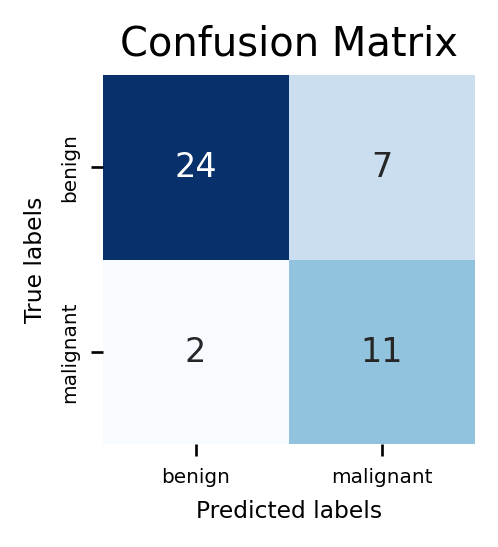

{'accuracy': 0.7954545454545454, 'balanced_accuracy': 0.8101736972704714, 'recall': 0.8461538461538461, 'precision': 0.6111111111111112, 'auc': 0.8387096774193549, 'f1_score': 0.7096774193548387, 'fbeta_score_0_1': 0.6127964699393271, 'fbeta_score_10': 0.8429438543247344, 'fpr': 0.22580645161290322, 'cm': array([[24,  7],
       [ 2, 11]])}
SVC
Model is already fitted. Skipping fitting step.


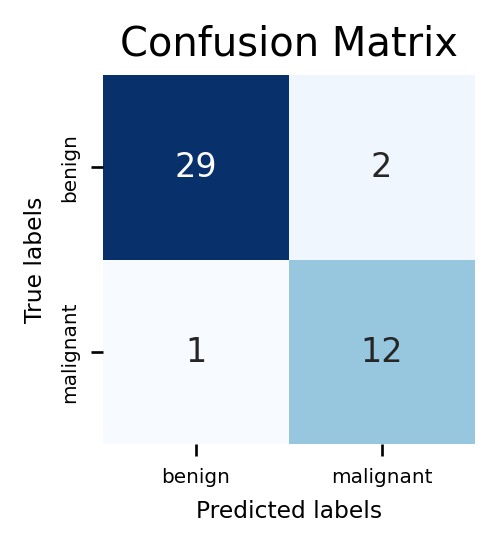

{'accuracy': 0.9318181818181818, 'balanced_accuracy': 0.9292803970223324, 'recall': 0.9230769230769231, 'precision': 0.8571428571428571, 'auc': 0.9826302729528535, 'f1_score': 0.8888888888888888, 'fbeta_score_0_1': 0.8577494692144374, 'fbeta_score_10': 0.9223744292237442, 'fpr': 0.06451612903225806, 'cm': array([[29,  2],
       [ 1, 12]])}
RandomForestClassifier
Model is already fitted. Skipping fitting step.


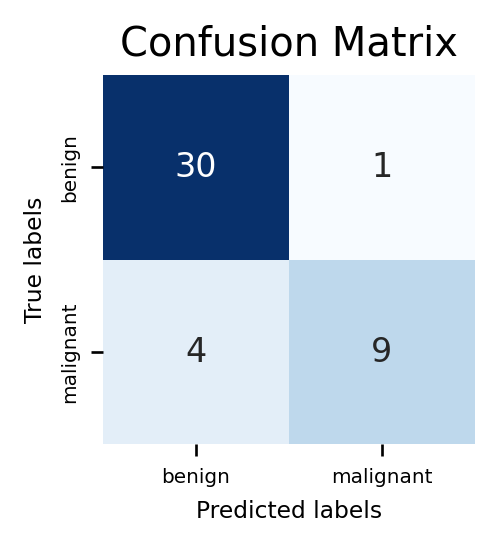

{'accuracy': 0.8863636363636364, 'balanced_accuracy': 0.8300248138957816, 'recall': 0.6923076923076923, 'precision': 0.9, 'auc': 0.9801488833746899, 'f1_score': 0.782608695652174, 'fbeta_score_0_1': 0.8973346495557748, 'fbeta_score_10': 0.6938931297709924, 'fpr': 0.03225806451612903, 'cm': array([[30,  1],
       [ 4,  9]])}


In [36]:
for model in best_models:
    print(model.__class__.__name__)
    print(evaluate_model(model, X_train_preprocessed, X_test_preprocessed, y_train, y_test, labels=labels))

Considering Recall and FPR, `SVC(C=374.60266483547775, coef0=0.9507143064099162, degree=4, gamma=0.6326213301195184, kernel='linear')` is the best model so far. We can finalize it and send it to production.

Model is already fitted. Skipping fitting step.


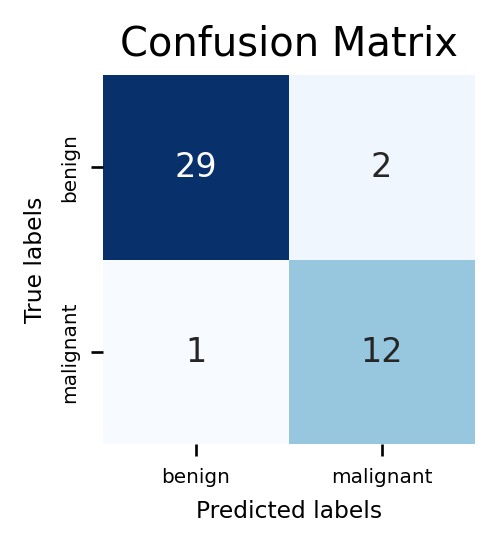

{'accuracy': 0.9318181818181818,
 'balanced_accuracy': 0.9292803970223324,
 'recall': 0.9230769230769231,
 'precision': 0.8571428571428571,
 'auc': 0.9826302729528535,
 'f1_score': 0.8888888888888888,
 'fbeta_score_0_1': 0.8577494692144374,
 'fbeta_score_10': 0.9223744292237442,
 'fpr': 0.06451612903225806,
 'cm': array([[29,  2],
        [ 1, 12]])}

In [37]:
svm = best_models[1]
results = evaluate_model(svm, X_train_preprocessed, X_test_preprocessed, y_train, y_test, labels)
results

In [38]:
print('Final Recall: {0}, \nFinal FPR: {1}'.format(results['recall'], results['fpr']))

Final Recall: 0.9230769230769231, 
Final FPR: 0.06451612903225806


In [39]:
import joblib
joblib.dump(svm, 'svm_model.pkl')
joblib.dump(preprocess_pipeline, 'preprocess_pipeline.pkl')

['preprocess_pipeline.pkl']

### 3.3 Final results

From the final results calculate the _probability_ that a sample from a person with a malignant tumour is given a result that they do not have cancer.

In [40]:
# Answer here
import numpy as np

def calculate_false_negative_rate(confusion_matrix):
    TP = confusion_matrix[0, 0]
    FN = confusion_matrix[0, 1]

    total_malignant_cases = TP + FN
    if total_malignant_cases == 0:
        return 0.0
    
    false_negative_rate = FN / total_malignant_cases
    return false_negative_rate

false_negative_rate = calculate_false_negative_rate(results['cm'])
print(f"The probability of a false negative is: {false_negative_rate:.2f}")


The probability of a false negative is: 0.06


## 4. Decision Boundaries [10%]
 - To finish up, the client wants a visualisation of how the final model is working and your line manager has asked you to show some of the decision boundaries.
 - The client also wants to know if your method has met their performance specifications.
 - Follow the next three steps (4.1, 4.2 and 4.3) to do these things.

### 4.1 Discriminative features

Although it is only possible to know the true usefulness of a feature when you've combined it with others in a machine learning method, it is still helpful to have some measure for how discriminative each feature is on its own.  One common method for doing this is to calculate a T-score (often used in statistics, and in the LDA machine learning method) for each feature.  

The formula for the T-score is:

_(mean(x2) - mean(x1))/(0.5*(stddev(x2) + stddev(x1)))_

where x1 and x2 are the feature values corresponding to the two classes. Large values for the T-score (either positive or negative) indicate discriminative ability.

**Calculate the T-score for each feature and print out the best 4 features according to this score.**

In [41]:
import numpy as np

def calculate_t_score(feature_values, labels):
    """
    Calculate the T-score for a feature.

    Parameters:
    feature_values (np.ndarray): The values of the feature.
    labels (np.ndarray): The class labels.

    Returns:
    float: The T-score for the feature.
    """
    labels = labels.ravel()
    x1 = feature_values[labels == 0]
    x2 = feature_values[labels == 1]
    
    mean_x1 = np.mean(x1)
    mean_x2 = np.mean(x2)
    stddev_x1 = np.std(x1, ddof=1)  # Using ddof=1 for sample standard deviation
    stddev_x2 = np.std(x2, ddof=1)
    
    t_score = (mean_x2 - mean_x1) / (0.5 * (stddev_x2 + stddev_x1))
    return t_score

def top_discriminative_features(data, labels, n=4):
    """
    Calculate the T-score for each feature and return the indices of the top N features.

    Parameters:
    data (np.ndarray): The dataset with features (rows are samples, columns are features).
    labels (np.ndarray): The class labels.
    n (int): The number of top features to return.

    Returns:
    list: The indices of the top N features sorted by T-score.
    """
    num_features = data.shape[1]
    t_scores = np.zeros(num_features)
    
    for i in range(num_features):
        t_scores[i] = calculate_t_score(data[:, i], labels)
    
    # Get the indices of the features sorted by absolute T-score in descending order
    sorted_indices = np.argsort(np.abs(t_scores))[::-1]
    
    top_indices = sorted_indices[:n]
    for idx in top_indices:
        print(f"Feature index: {idx}, T-score: {t_scores[idx]:.4f}")
    
    return top_indices.tolist()


In [42]:
X_full = np.r_[X_train_preprocessed, X_test_preprocessed]
y_full = np.r_[y_train, y_test]

top_feature_indices = top_discriminative_features(X_full, y_full)

Feature index: 7, T-score: 2.3382
Feature index: 2, T-score: 1.9282
Feature index: 0, T-score: 1.8241
Feature index: 13, T-score: 1.7372


In [43]:
top_features = pd.DataFrame({'Feature': X.columns[top_feature_indices], 'T-score': [calculate_t_score(X_full[:, i], y_full) for i in top_feature_indices]})
top_features

,Feature,T-score
0,mean concave points,2.338207
1,mean perimeter,1.928208
2,mean radius,1.824063
3,area error,1.737216


### 4.2 Visualise decision boundaries

**Display the decision boundaries** for each pair of features from the best 4 chosen above.  You can use the functions below to help if you like.

Instead of using the simple mean as the input for `xmean` in `plot_contours`, use the following:

_0.5*(mean(x1) + mean(x2))_

where x1 and x2 are the data associated with the two classes.  This way of calculating a "mean" point takes into account any imbalance between the classes.

In [44]:
def make_meshgrid(x, y, ns=100):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on (only min and max used)
    y: data to base y-axis meshgrid on (only min and max used)
    ns: number of steps in grid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min(), x.max()
    y_min, y_max = y.min(), y.max()
    hx = (x_max - x_min)/ns
    hy = (y_max - y_min)/ns
    xx, yy = np.meshgrid(np.arange(x_min, x_max + hx, hx), np.arange(y_min, y_max + hy, hy))
    return xx, yy

In [45]:
def plot_contours(clf, xx, yy, xmean, n1, n2, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    xmean : 1d array of N mean values (used to populate constant features with)
    n1, n2: index numbers of features that change
              that is, which features xx and yy represent, from the set of N features
    params: dictionary of params to pass to contourf, optional
    """
    # The following lines makes an MxN matrix to pass to the classifier (# samples x # features)
    # It does this by multiplying Mx1 and 1xN matrices, where the former is filled with 1's
    #  where M is the number of grid points in xx and N is the number of features in xmean
    #  It is done in such a way that the xmean vector is replaced in each row
    fullx = np.ones((xx.ravel().shape[0],1)) * np.reshape(xmean,(1,-1))
    fullx[:,n1] = xx.ravel()
    fullx[:,n2] = yy.ravel()
    Z = clf.predict(fullx)
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

In [46]:
def plot_decision_boundaries(X, top_features, y, model):
    """
    Plot decision boundaries for each pair of top 4 features.

    Parameters
    ----------
    X: ndarray of shape (n_samples, n_features)
        Preprocessed data.
    top_features: list of int
        Indices of the top 4 features.
    y: ndarray of shape (n_samples,)
        Labels.
    model: A trained classifier
        The model to use for plotting decision boundaries.
    """
    assert len(top_features) == 4, "top_features must contain exactly 4 feature indices."

    feature_pairs = [(top_features[i], top_features[j]) for i in range(len(top_features)) for j in range(i + 1, len(top_features))]
    
    plt.figure(figsize=(20, 15))
    
    for k, (n1, n2) in enumerate(feature_pairs):
        plt.subplot(3, 2, k + 1)

        x = X[:, n1]
        y_ = X[:, n2]

        xx, yy = make_meshgrid(x, y_)

        xmean = np.mean(X, axis=0)
        
        plot_contours(model, xx, yy, xmean, n1, n2, alpha=0.8)
        plt.scatter(x, y_, c=y, edgecolors='k', marker='o', s=20)
        plt.xlabel(features[n1])
        plt.ylabel(features[n2])
        plt.title(f'Decision boundary for "{features[n1]}" and "{features[n2]}"')
    
    plt.tight_layout()
    plt.show()

# Example usage
# Assuming you have a trained model `clf`, preprocessed data `X`, labels `y`, and top 4 feature indices `top_features`
# plot_decision_boundaries(X, top_features, y, clf)


In [47]:
X_full = np.r_[X_train_preprocessed, X_test_preprocessed]
y_full = np.r_[y_train, y_test]

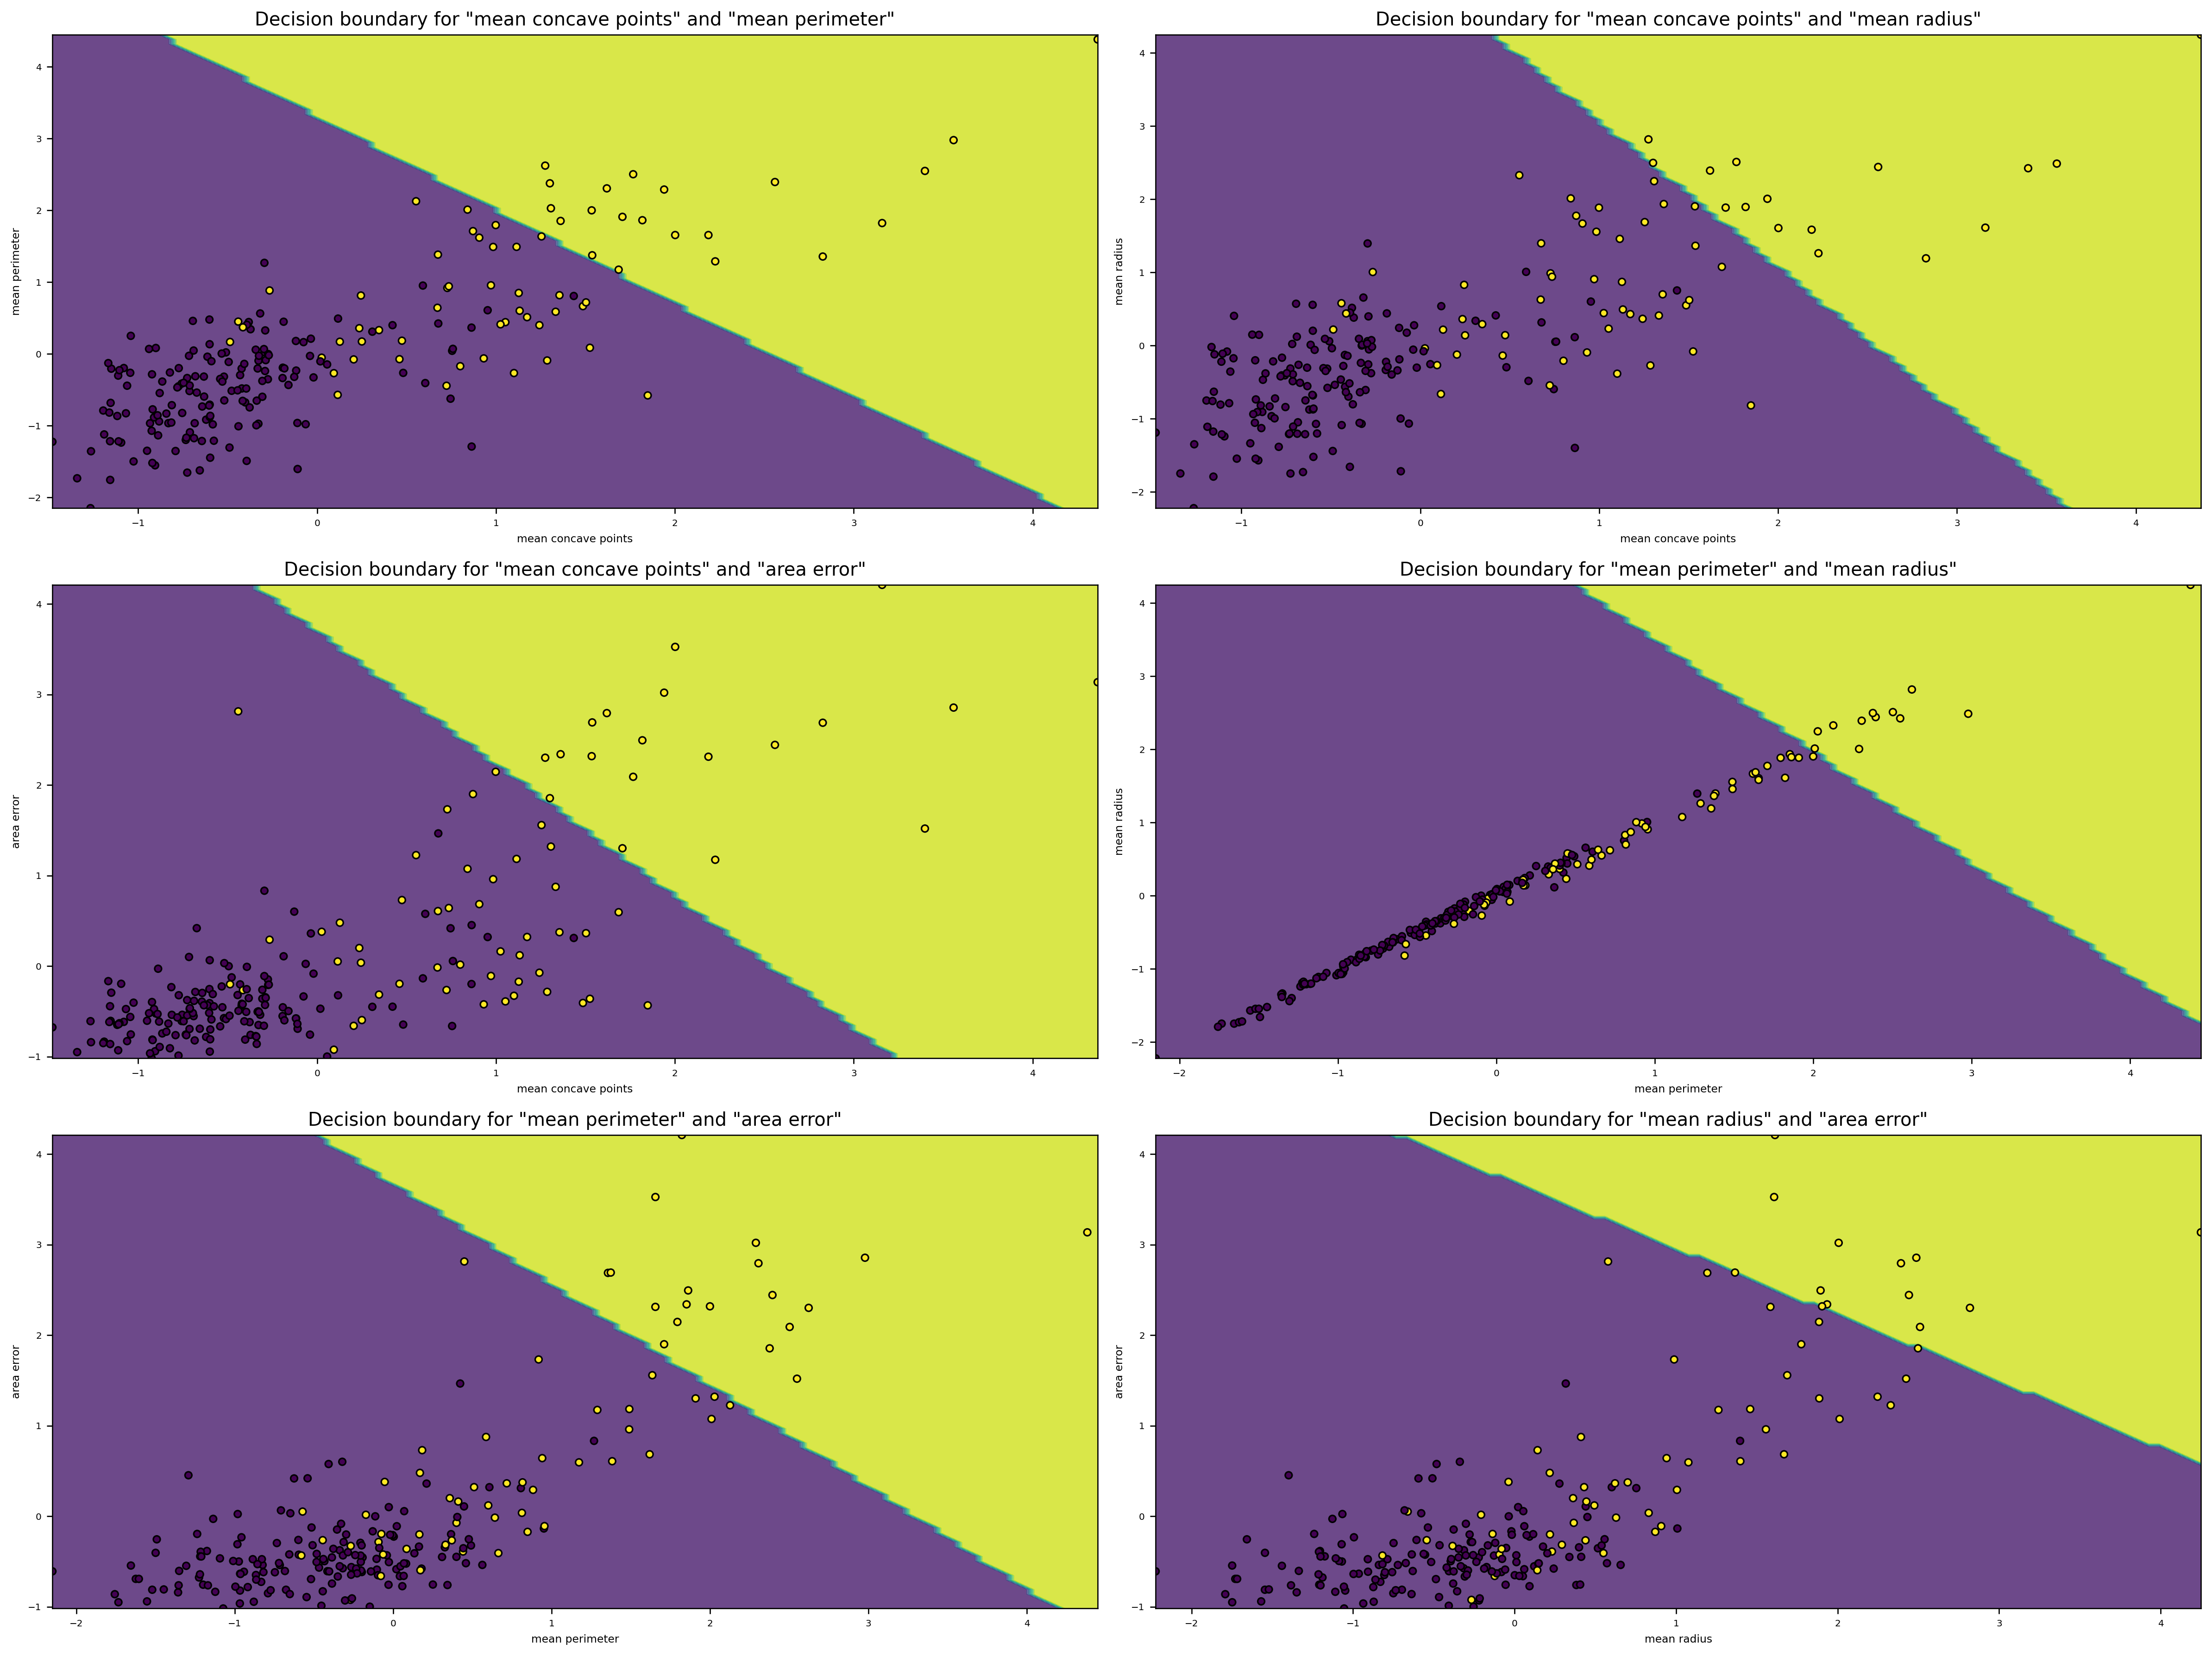

In [48]:
plot_decision_boundaries(X=X_full, top_features=top_feature_indices, y=y_full, model=svm)

### 4.3 Performance specification
**Does the final model meet the client's criteria?  Explain why or why not.** [100 words maximum]

Yes, the final model meets all the client's requirements, which were as follows:
1. The True Positive Rate of the final model should be greater than 0.9, or the final model should have at least a 90% probability of detecting malignant cancer when it is present. We have a Recall of over **0.92**.
2. The False Positive Rate should be less than 0.2, or no more than 1 in 5 healthy cases (those with benign growths) should result in a false positive (labeled as malignant). We have an FPR of around **0.06**
3. The model should be explainable, using decision boundaries of discriminative features.